<a href="https://colab.research.google.com/github/ssudheerrao/test/blob/master/Implementing_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Logistics Regression in Python

In [1]:
#Initially loading few Libraries 

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Classification Data.csv to Classification Data.csv


In [4]:
#Reading input Data
import io
MyData = pd.read_csv(io.BytesIO(uploaded['Classification Data.csv']))
MyData

,Customer_Age,Customer_Loan_Amount,Loan_Status
0,31,1000,1
1,29,1200,1
2,56,800,1
3,45,1300,1
4,34,5600,0
5,67,700,0
6,54,900,0
7,39,2300,0
8,64,9800,0
9,30,6500,0


In [0]:
#Viewing Data
#MyData

# Data Cleaning and outlier treatment code goes here...........

# Data preparation steps

In [0]:
#Loading machine learning library from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
#Separating train and test data
independent_variables = ['Customer_Age','Customer_Loan_Amount']
X = MyData[independent_variables]       # independent variable
y = MyData['Loan_Status']                # dependent variable 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
print('train:', len(X_train), 'test:', len(X_test))

train: 24 test: 16


# Training the classification model

In [8]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.625

# Evaluating the model

In [9]:
# predict will give the predited result for test set
print(model.predict(X_test))

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
# generate evaluation metrics
from sklearn import metrics

print ("Accuracy ON TEST SET :", metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy ON TEST SET : 0.1875


In [11]:

print ("Confusion matrix :",metrics.confusion_matrix(y_test, model.predict(X_test)))


Confusion matrix : [[ 2 13]
 [ 0  1]]


ROC AUC: 0.40


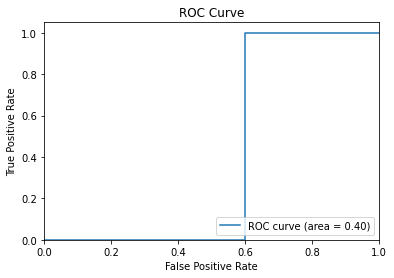

In [12]:
#ROC CURVE
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#Receiver operating characteristic
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
print(fpr)

[0.         0.06666667 0.6        0.6        1.        ]


In [14]:
print(tpr)

[0. 0. 0. 1. 1.]
